Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB

Missing values check:
Area                 0
Perimeter            0
Major_Axis_Length    0
Minor

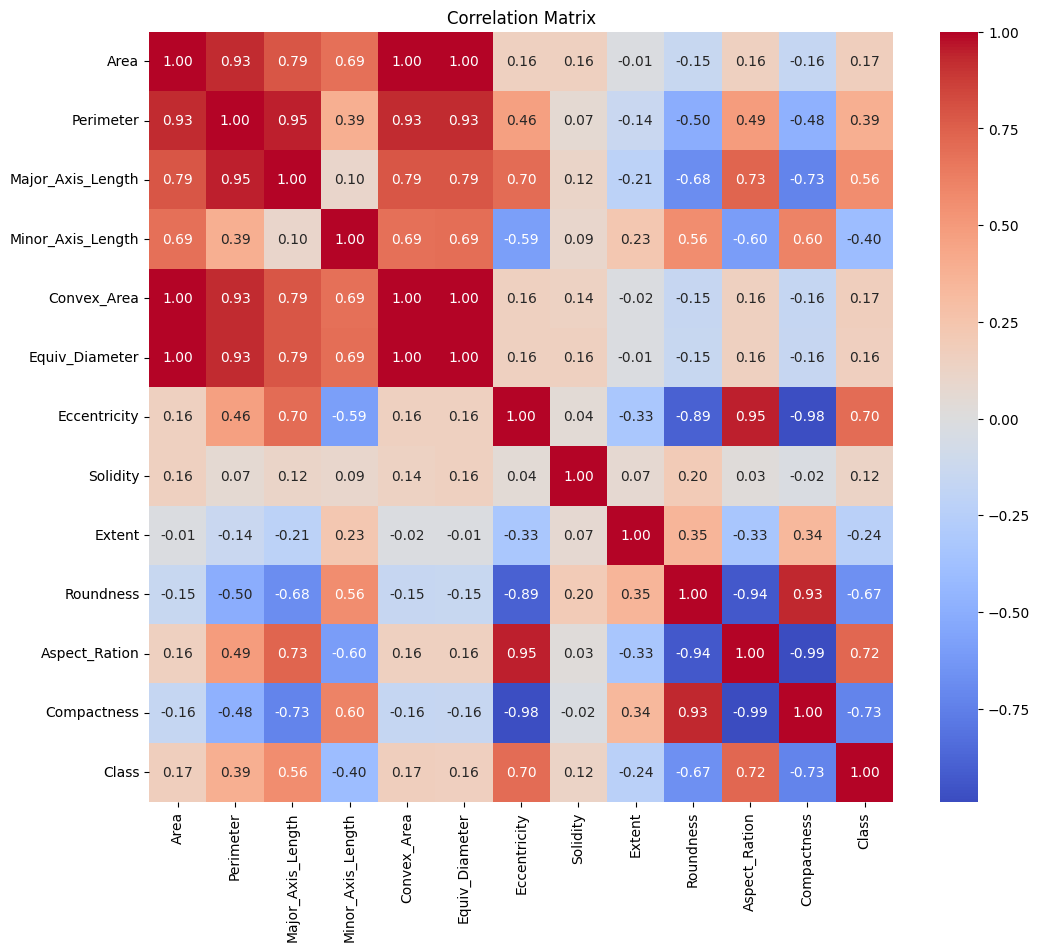


Training default SVR model...
Default SVR - Mean Squared Error: 0.1064
Default SVR - R^2 Score: 0.5743

Starting RandomizedSearchCV...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best parameters found: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}

Training optimized SVR model...
Tuned SVR - Mean Squared Error: 0.1064
Tuned SVR - R^2 Score: 0.5743


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load data with error handling for encoding
try:
    df = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/Pumpkin_Seeds_Dataset-Table 1.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/Pumpkin_Seeds_Dataset-Table 1.csv', encoding='latin1')

# Data Exploration
print("Data Info:")
df.info()
print("\nMissing values check:")
print(df.isnull().sum())

# Handle categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Data Visualization
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Assume the last column is the target variable (modify if needed)
target_column = numeric_columns[-1]
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Default SVR Model (Before Hyperparameter Tuning)
print("\nTraining default SVR model...")
svr_model = SVR(kernel='rbf', C=1, gamma='scale')
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)

# Evaluate default SVR model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Default SVR - Mean Squared Error: {mse:.4f}")
print(f"Default SVR - R^2 Score: {r2:.4f}")

# Hyperparameter tuning with RandomizedSearchCV (Faster than GridSearchCV)
param_grid = {
    'C': [0.1, 1, 10, 100],  # Wider range for C
    'kernel': ['linear', 'rbf'],  # Removed 'poly' (too slow)
    'gamma': ['scale', 0.01, 0.1, 1]
}

print("\nStarting RandomizedSearchCV...")
random_search = RandomizedSearchCV(
    SVR(), param_grid, n_iter=6, cv=3, scoring='r2', verbose=1, n_jobs=-1, random_state=42
)
random_search.fit(X_train_scaled, y_train)

# Best model
best_params = random_search.best_params_
print(f"\nBest parameters found: {best_params}")

# Retrain SVR with best parameters
print("\nTraining optimized SVR model...")
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train_scaled, y_train)
y_pred_best = best_svr_model.predict(X_test_scaled)

# Evaluate tuned SVR model
mse_tuned = mean_squared_error(y_test, y_pred_best)
r2_tuned = r2_score(y_test, y_pred_best)

print(f"Tuned SVR - Mean Squared Error: {mse_tuned:.4f}")
print(f"Tuned SVR - R^2 Score: {r2_tuned:.4f}")
